In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading data

In [2]:
travel = pd.read_csv('data_travel.csv',skipinitialspace=True)
travel.head()

,interested_travel,computer_owner,age,home_value,loan_ratio,risk_score,marital,interested_sport,HH_grandparent,HH_dieting,HH_head_age,auto_member,interested_golf,interested_gambling,HH_has_children,HH_adults_num,interested_reading
0,NaN,NaN,64,124035,73,932,3,312,420,149,96,626,0,0,NaN,NaN,0
1,0.0,1.0,69,138574,73,1000,7,241,711,263,68,658,0,0,N,5.0,3
2,0.0,0.0,57,148136,77,688,1,367,240,240,56,354,0,1,N,2.0,1
3,1.0,1.0,80,162532,74,932,7,291,832,197,86,462,1,1,Y,2.0,3
4,1.0,1.0,48,133580,77,987,10,137,121,209,42,423,0,1,Y,3.0,3


In [3]:
travel.shape

(167177, 17)

In [4]:
travel.describe(include='all')

,interested_travel,computer_owner,age,home_value,loan_ratio,risk_score,marital,interested_sport,HH_grandparent,HH_dieting,HH_head_age,auto_member,interested_golf,interested_gambling,HH_has_children,HH_adults_num,interested_reading
count,149788.000000,149788.000000,167177.000000,167177.000000,167177.000000,167177.000000,167177.000000,167177.000000,167177.000000,167177.000000,167177.000000,167177.000000,167177.000000,167177.000000,159899,145906.000000,167177
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,3
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111462,NaN,65096
mean,0.427745,0.856571,59.507079,207621.314798,66.762707,817.031751,6.884015,259.431776,377.072498,204.593341,59.368023,486.861273,0.373012,0.357842,NaN,2.770832,NaN
std,0.494753,0.350511,14.311733,107822.501900,9.751835,165.490295,2.610552,78.867456,248.045395,78.971038,16.712912,151.167457,0.483607,0.479367,NaN,1.285417,NaN
min,0.000000,0.000000,18.000000,48910.000000,0.000000,1.000000,1.000000,60.000000,0.000000,47.000000,18.000000,49.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,0.000000,1.000000,49.000000,135595.000000,63.000000,748.000000,5.000000,204.000000,182.000000,144.000000,48.000000,377.000000,0.000000,0.000000,NaN,2.000000,NaN
50%,0.000000,1.000000,59.000000,182106.000000,69.000000,844.000000,7.000000,251.000000,351.000000,185.000000,60.000000,492.000000,0.000000,0.000000,NaN,2.000000,NaN
75%,1.000000,1.000000,70.000000,248277.000000,73.000000,945.000000,9.000000,306.000000,528.000000,252.000000,71.000000,600.000000,1.000000,1.000000,NaN,4.000000,NaN


## Data Pre-processing

In [5]:
# list columns containing NA values
# sum(df[''].isnull())
travel.apply(lambda X: sum(X.isnull()), axis=0)

interested_travel      17389
computer_owner         17389
age                        0
home_value                 0
loan_ratio                 0
risk_score                 0
marital                    0
interested_sport           0
HH_grandparent             0
HH_dieting                 0
HH_head_age                0
auto_member                0
interested_golf            0
interested_gambling        0
HH_has_children         7278
HH_adults_num          21271
interested_reading         0
dtype: int64

**1. Deal with missing values.**    
First, calculate the percentage of missing values for every column, and plot them as a bar chart.

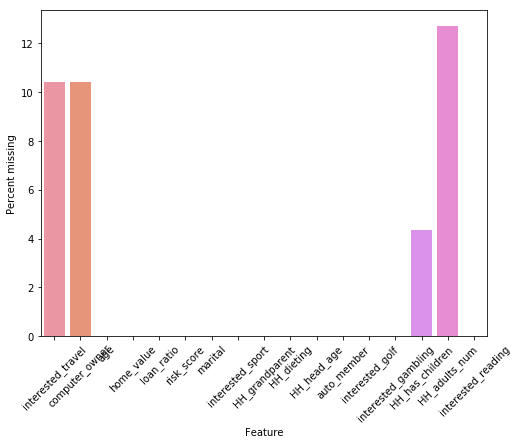

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

null_vals = travel.isnull().sum()/len(travel)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

For the Categorical variables('interested_travel', 'computer_owner', 'HH_adults_num'), since the proportion of missing data for each column is not that high, we choose to fill the missing values with it mode.


In [7]:
fill_cols = ['interested_travel', 'computer_owner', 'HH_adults_num']
fill_values = {col: travel[col].mode()[0] for col in fill_cols}

travel = travel.fillna(fill_values)

**2. Fixing error values**
* 'HH_has_children' is a bianry variable, its NaN means no child. We should fill NaN in this column with 0.

In [8]:
travel['HH_has_children'] = travel['HH_has_children']\
    .replace({'N':0, 'Y':1, np.NaN:0})

* In the 'interested_reading' column, some error values is ".", we replace then with '0', which means this clients are not interested in reading.

In [9]:
travel['interested_reading'].value_counts(dropna=False)

3    65096
1    43832
0    32919
2    24488
.      842
Name: interested_reading, dtype: int64

In [10]:
travel['interested_reading'] = travel['interested_reading']\
    .replace({'.':'0'}).astype('int')

Check NA values again

In [11]:
travel.apply(lambda X: sum(X.isnull()), axis=0)

interested_travel      0
computer_owner         0
age                    0
home_value             0
loan_ratio             0
risk_score             0
marital                0
interested_sport       0
HH_grandparent         0
HH_dieting             0
HH_head_age            0
auto_member            0
interested_golf        0
interested_gambling    0
HH_has_children        0
HH_adults_num          0
interested_reading     0
dtype: int64

In [12]:
#Check types of each column with the dataframe info () method
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167177 entries, 0 to 167176
Data columns (total 17 columns):
interested_travel      167177 non-null float64
computer_owner         167177 non-null float64
age                    167177 non-null int64
home_value             167177 non-null int64
loan_ratio             167177 non-null int64
risk_score             167177 non-null int64
marital                167177 non-null int64
interested_sport       167177 non-null int64
HH_grandparent         167177 non-null int64
HH_dieting             167177 non-null int64
HH_head_age            167177 non-null int64
auto_member            167177 non-null int64
interested_golf        167177 non-null int64
interested_gambling    167177 non-null int64
HH_has_children        167177 non-null int64
HH_adults_num          167177 non-null float64
interested_reading     167177 non-null int64
dtypes: float64(3), int64(14)
memory usage: 21.7 MB


In [13]:
# Customers's 'interested_travel' is the target, we count the value first.
travel["interested_travel"].value_counts()

0.0    103106
1.0     64071
Name: interested_travel, dtype: int64

In [14]:
travel.head()

,interested_travel,computer_owner,age,home_value,loan_ratio,risk_score,marital,interested_sport,HH_grandparent,HH_dieting,HH_head_age,auto_member,interested_golf,interested_gambling,HH_has_children,HH_adults_num,interested_reading
0,0.0,1.0,64,124035,73,932,3,312,420,149,96,626,0,0,0,2.0,0
1,0.0,1.0,69,138574,73,1000,7,241,711,263,68,658,0,0,0,5.0,3
2,0.0,0.0,57,148136,77,688,1,367,240,240,56,354,0,1,0,2.0,1
3,1.0,1.0,80,162532,74,932,7,291,832,197,86,462,1,1,1,2.0,3
4,1.0,1.0,48,133580,77,987,10,137,121,209,42,423,0,1,1,3.0,3


In [15]:
travel.corr()

,interested_travel,computer_owner,age,home_value,loan_ratio,risk_score,marital,interested_sport,HH_grandparent,HH_dieting,HH_head_age,auto_member,interested_golf,interested_gambling,HH_has_children,HH_adults_num,interested_reading
interested_travel,1.000000,0.243593,0.233451,-0.059220,-0.056458,0.053632,0.092715,0.174696,0.279099,0.234906,0.103613,0.203072,0.213267,0.311605,-0.016154,0.076675,0.494027
computer_owner,0.243593,1.000000,0.055306,0.039980,-0.054217,0.046954,0.134214,0.097534,0.025138,0.124654,-0.022815,0.128215,0.094610,0.099253,0.014486,0.068110,0.290873
age,0.233451,0.055306,1.000000,-0.109622,-0.177290,0.221600,-0.021054,0.156327,0.565440,-0.022141,0.637930,0.351094,0.121862,0.163380,-0.405115,0.119545,0.267435
home_value,-0.059220,0.039980,-0.109622,1.000000,-0.538262,0.201041,0.271353,0.320814,-0.285798,0.004959,-0.113570,0.400851,0.159089,-0.063217,0.115167,0.070108,-0.004647
loan_ratio,-0.056458,-0.054217,-0.177290,-0.538262,1.000000,-0.194886,-0.227747,-0.287482,-0.024647,-0.035066,-0.078823,-0.427247,-0.158529,-0.066844,0.015358,-0.166619,-0.126610
risk_score,0.053632,0.046954,0.221600,0.201041,-0.194886,1.000000,0.086300,0.292910,0.019073,0.013894,0.149541,0.326615,0.109541,-0.000022,-0.085113,0.051710,0.084951
marital,0.092715,0.134214,-0.021054,0.271353,-0.227747,0.086300,1.000000,0.037679,-0.152996,-0.079793,-0.137620,0.277354,0.232240,0.129597,0.376839,0.469695,0.279237
interested_sport,0.174696,0.097534,0.156327,0.320814,-0.287482,0.292910,0.037679,1.000000,0.040318,0.492793,0.075564,0.437917,0.129987,0.105617,-0.041517,0.067482,0.222822
HH_grandparent,0.279099,0.025138,0.565440,-0.285798,-0.024647,0.019073,-0.152996,0.040318,1.000000,0.053351,0.568765,0.159837,0.089135,0.238573,-0.358043,0.046641,0.254132
HH_dieting,0.234906,0.124654,-0.022141,0.004959,-0.035066,0.013894,-0.079793,0.492793,0.053351,1.000000,-0.144299,0.120253,0.013133,0.207122,0.076980,0.067951,0.249152


## train-valid-test split

In [16]:
travel.shape

(167177, 17)

In [19]:
#Separate out X and Y

Y = travel.iloc[:, :1]
X = travel.iloc[:, 1:17]

In [20]:
print(X.shape)
X.head()

(167177, 16)


,computer_owner,age,home_value,loan_ratio,risk_score,marital,interested_sport,HH_grandparent,HH_dieting,HH_head_age,auto_member,interested_golf,interested_gambling,HH_has_children,HH_adults_num,interested_reading
0,1.0,64,124035,73,932,3,312,420,149,96,626,0,0,0,2.0,0
1,1.0,69,138574,73,1000,7,241,711,263,68,658,0,0,0,5.0,3
2,0.0,57,148136,77,688,1,367,240,240,56,354,0,1,0,2.0,1
3,1.0,80,162532,74,932,7,291,832,197,86,462,1,1,1,2.0,3
4,1.0,48,133580,77,987,10,137,121,209,42,423,0,1,1,3.0,3


In [21]:
print(Y.shape)
Y.head()

(167177, 1)


,interested_travel
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0


In [22]:
# Train- Test Split
from sklearn.model_selection import train_test_split

(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.4, random_state=1)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(100306, 16) (66871, 16) (100306, 1) (66871, 1)


In [23]:
# Train-Validation Split
(X_val, X_test, Y_val, Y_test) = train_test_split(X_test, Y_test, test_size=0.5, random_state=1)
print(X_test.shape,X_val.shape,Y_test.shape,Y_val.shape)

(33436, 16) (33435, 16) (33436, 1) (33435, 1)


## DNN for Classification

**1. Build and compile a deep learning model**

In [24]:
'''Import necessary packages'''
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline

Using TensorFlow backend.


In [25]:
# Build the deep neural network
model = Sequential()
model.add(Dense(10, input_dim=16, init='uniform', activation='relu'))
model.add(Dense(50, init='uniform', activation='relu'))
model.add(Dense(100, init='uniform', activation='relu'))
model.add(Dense(50, init='uniform', activation='relu'))
model.add(Dense(20, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))


W0814 22:24:58.708086 140735993602944 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=16, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
W0814 22:24:58.738354 140735993602944 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0814 22:24:58.744634 140735993602944 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/anac

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 11,911
Trainable params: 11,911
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the DNN

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

W0814 22:25:06.689630 140735993602944 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0814 22:25:06.719354 140735993602944 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0814 22:25:06.724314 140735993602944 deprecation.py:323] From /anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


**2. Training and Parameter tuning**  
Fit the DNN with train data, and tune hyper-parameters with the validation dataset.

In [28]:
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), nb_epoch=20, batch_size=5)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0814 22:25:11.816725 140735993602944 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 100306 samples, validate on 33435 samples
Epoch 1/20
100306/100306 [==============================] - 32s 321us/step - loss: 0.6662 - acc: 0.6160 - val_loss: 0.6661 - val_acc: 0.6160
Epoch 2/20
100306/100306 [==============================] - 29s 287us/step - loss: 0.6661 - acc: 0.6160 - val_loss: 0.6660 - val_acc: 0.6160
Epoch 3/20
100306/100306 [==============================] - 29s 292us/step - loss: 0.6661 - acc: 0.6160 - val_loss: 0.6665 - val_acc: 0.6160
Epoch 4/20
100306/100306 [==============================] - 28s 281us/step - loss: 0.6661 - acc: 0.6160 - val_loss: 0.6660 - val_acc: 0.6160
Epoch 5/20
100306/100306 [==============================] - 28s 282us/step - loss: 0.6661 - acc: 0.6160 - val_loss: 0.6661 - val_acc: 0.6160
Epoch 6/20
100306/100306 [==============================] - 28s 280us/step - loss: 0.6660 - acc: 0.6160 - val_loss: 0.6660 - val_acc: 0.6160
Epoch 7/20
100306/100306 [==============================] - 28s 281us/step - loss: 0.6660 - acc: 0.6160

**Test and Validation**     
Test model with testset.

In [29]:
# Evaluate the model
scores = model.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

33436/33436 [==============================] - 0s 14us/step
Accuracy: 61.98%


Report results usingROC curves, report AUC values.

In [30]:
from sklearn.metrics import roc_curve,auc
y_pred = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc = auc(fpr, tpr)

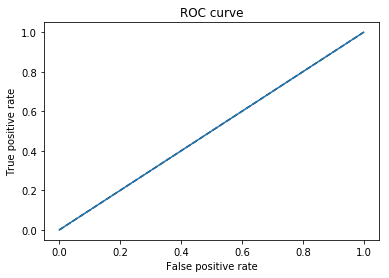

In [31]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='DNN (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

## GradientBoostingClassifier 

**1. Build and compile a baseline model**
Setup a model as baseline with default parameters, without any tuning. 

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

gbm0 = GradientBoostingClassifier(random_state=10)
gbm0.fit(X_train,Y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [33]:
#Evaluate training set accuracy
Y_pred = gbm0.predict(X_test)
Y_predprob = gbm0.predict_proba(X_test)[:,1]
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("AUC score(Validation set):",roc_auc_score(Y_test, Y_predprob))

Accuracy: 0.7799676994855844
AUC score(Validation set): 0.8491730920081043


**2. Parameter tuning with gridsearch**

Set some initial values of parameters.  
* min_samples_split = 800 : This should be ~0.5-1% of total values.
* min_samples_leaf = 50 : Can be selected based on intuition. This is just used for preventing overfitting and again a small value because of imbalanced classes.
* max_depth = 8 : Should be chosen (5-8) based on the number of observations and predictors.
* max_features = ‘sqrt’ : Its a general thumb-rule to start with square root.
* subsample = 0.8 : This is a commonly used used start value

In [34]:
from sklearn.model_selection import GridSearchCV

We take the default learning rate of 0.1 here and check the optimum number of trees for that. We can do a grid search and test out values from 20 to 80 in steps of 10.

In [35]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(
    estimator = GradientBoostingClassifier(
        learning_rate=0.1, 
        min_samples_split=800,
        min_samples_leaf=50,
        max_depth=8,
        max_features='sqrt',
        subsample=0.8,
        random_state=10), 
    param_grid = param_test1, 
    scoring='roc_auc',
    n_jobs=4,
    iid=False, 
    cv=5)
gsearch1.fit(X_train,Y_train)
gsearch1.cv_results_,gsearch1.best_params_, gsearch1.best_score_

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


({'mean_fit_time': array([ 4.74763784,  7.75991163, 10.47974868, 11.32891507, 12.76149421,
         15.2625874 , 14.47450161]),
  'std_fit_time': array([0.07342837, 0.55630058, 0.41287439, 0.13316997, 0.16619585,
         0.37016949, 2.22843321]),
  'mean_score_time': array([0.04414616, 0.06467586, 0.07968907, 0.07546215, 0.08765302,
         0.09896755, 0.08694725]),
  'std_score_time': array([0.00147253, 0.01251207, 0.00934964, 0.00463765, 0.01055283,
         0.01093388, 0.01709175]),
  'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_estimators': 50},
   {'n_estimators': 60},
   {'n_estimators': 70},
   {'n_estimators': 80}],
  'split0_test_score': array([0.84992189, 0.85125009, 0.8516749 , 0.85204298, 0.85233256,
         0.85246323, 0.85236772]),

Here we got 80 as the optimal estimators for 0.1 learning rate. 

**3. Tuning tree-specific parameters**  
We plan to do this in following stages:  
* Tune max_depth and num_samples_split
* Tune min_samples_leaf
* Tune max_features  

And we will train the model with validation set.  
To get stared, we test max_depth values of 6 to 15 in steps of 2 and min_samples_split from 200 to 1000 in steps of 200. From the result of last model, we pass n_estimators=80 to the new model.

In [36]:
param_test2 = {'max_depth':range(6,16,2), 'min_samples_split':range(400,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                               n_estimators=80, 
                                                               max_features='sqrt', 
                                                               subsample=0.8, 
                                                               random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_val,Y_val)
gsearch2.cv_results_,gsearch2.best_params_, gsearch2.best_score_

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


({'mean_fit_time': array([2.60253253, 2.40512743, 2.34855237, 2.42442236, 3.72726765,
         3.70558858, 3.5687674 , 3.35386701, 5.08695502, 4.80928941,
         4.21949592, 3.920153  , 5.94347715, 5.21032724, 4.81094871,
         4.39235444, 6.46665416, 5.7120903 , 5.38878684, 4.43371358]),
  'std_fit_time': array([0.03451698, 0.01997649, 0.02800728, 0.09053475, 0.2427248 ,
         0.07085902, 0.12261025, 0.14052146, 0.19266412, 0.17932659,
         0.09080689, 0.07061585, 0.20903825, 0.16626702, 0.10891101,
         0.06165064, 0.10634352, 0.07416183, 0.243188  , 0.33732753]),
  'mean_score_time': array([0.02943935, 0.02593031, 0.02547803, 0.02696486, 0.03403039,
         0.04183946, 0.03738427, 0.0398778 , 0.04423966, 0.04304686,
         0.04083905, 0.04880433, 0.04808183, 0.04743919, 0.04357228,
         0.04118171, 0.06479869, 0.05058193, 0.05010619, 0.0364254 ]),
  'std_score_time': array([0.00575636, 0.00143098, 0.00140254, 0.00260966, 0.00258833,
         0.00583046, 0.0054

The ideal values are 8 for max_depth and 1000 for min_samples_split. And 1000 is an extreme value we tested.   
We take the 'max_depth' of 8 as optimum, then tune min_samples_split for a larger scope with min_samples_leaf together.

In [37]:
param_test3 = {'min_samples_split':range(1000,1601,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                               n_estimators=80, 
                                                               max_features='sqrt',
                                                               min_samples_split=600,
                                                               subsample=0.8, 
                                                               random_state=10), 
                        param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_val,Y_val)
gsearch3.cv_results_,gsearch3.best_params_, gsearch3.best_score_

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


({'mean_fit_time': array([1.36658344, 1.4816329 , 1.43372922, 1.37050943, 1.33240066,
         1.33216248, 1.41905293, 1.38207135, 1.36829515, 1.30546627,
         1.29765892, 1.27844863, 1.45728183, 1.7032732 , 1.71036792,
         1.94992661, 2.38505716, 2.14954319, 1.91150603, 1.82275329]),
  'std_fit_time': array([0.02405347, 0.12875035, 0.13116609, 0.03242529, 0.01073945,
         0.04007795, 0.01128773, 0.04120108, 0.01911222, 0.02230267,
         0.02190587, 0.03566793, 0.04855843, 0.05165649, 0.07478331,
         0.20552042, 0.05685207, 0.14052779, 0.07917009, 0.07982849]),
  'mean_score_time': array([0.0194768 , 0.02209306, 0.02141943, 0.02303052, 0.01878495,
         0.02140737, 0.0247241 , 0.02177768, 0.0202188 , 0.01969695,
         0.01930737, 0.0212306 , 0.02993698, 0.03219147, 0.0331562 ,
         0.03440447, 0.02351146, 0.02796149, 0.02897444, 0.02235069]),
  'std_score_time': array([0.00185003, 0.00443309, 0.00482194, 0.0075891 , 0.00130479,
         0.00600127, 0.0043

 We can see the CV score increased. Let’s fit the model again on this and have a look at the feature importance.

In [39]:
gbm1 = GradientBoostingClassifier(learning_rate=0.1, 
                                  n_estimators=80, 
                                  max_features='sqrt',
                                  min_samples_split=1600,
                                  subsample=0.8,
                                  max_depth=8,
                                  min_samples_leaf=40,
                                  random_state=10)
gbm1.fit(X_train,Y_train)
Y_pred = gbm1.predict(X_test)
Y_predprob = gbm1.predict_proba(X_test)[:,1]
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("AUC score(Validation set):",roc_auc_score(Y_test, Y_predprob))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7839454480200981
AUC score(Validation set): 0.8519579613399733


Compared to the base model, Both the accuracy and AUC are slightly improved.

In [41]:
param_test4 = {'max_features':range(7,16,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                               n_estimators=80, 
                                                               max_features='sqrt',
                                                               min_samples_split=1600,
                                                               subsample=0.8, 
                                                               max_depth=8,
                                                               min_samples_leaf=40,
                                                               random_state=10), 
                        param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_val,Y_val)
gsearch4.cv_results_,gsearch4.best_params_, gsearch4.best_score_

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


({'mean_fit_time': array([4.14935036, 4.54371614, 5.65049663, 7.10192666, 8.24513845]),
  'std_fit_time': array([0.11619346, 0.08281381, 0.37188571, 0.17012814, 1.48626544]),
  'mean_score_time': array([0.03126178, 0.03112631, 0.03116627, 0.03306379, 0.03274488]),
  'std_score_time': array([0.00410235, 0.00254962, 0.00149578, 0.0031525 , 0.01008783]),
  'param_max_features': masked_array(data=[7, 9, 11, 13, 15],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_features': 7},
   {'max_features': 9},
   {'max_features': 11},
   {'max_features': 13},
   {'max_features': 15}],
  'split0_test_score': array([0.84423808, 0.84432837, 0.84508346, 0.8453164 , 0.84362764]),
  'split1_test_score': array([0.84634811, 0.84645012, 0.84560371, 0.84556173, 0.84648595]),
  'split2_test_score': array([0.85424329, 0.85439068, 0.85361054, 0.85431249, 0.85438519]),
  'split3_test_score': array([0.85341125, 0.85424131, 0.8534974

Pass the best value of max_features to the model. And then evaluate the performance.

In [45]:
gbm2 = GradientBoostingClassifier(learning_rate=0.1, 
                                  n_estimators=80, 
                                  max_features=13,
                                  min_samples_split=1600,
                                  subsample=0.8,
                                  max_depth=8,
                                  min_samples_leaf=40,
                                  random_state=10)
gbm2.fit(X_train,Y_train)
Y_pred = gbm2.predict(X_test)
Y_predprob = gbm2.predict_proba(X_test)[:,1]
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("AUC score(Validation set):",roc_auc_score(Y_test, Y_predprob))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7828687642062447
AUC score(Validation set): 0.852073029958353


Compared to model gbm1, the accuracy and AUC of gbm2 increased slightly.


## Conclusion
Since the GBM method perform better then DNN, in this customer insight problem, the Gradient Boosting Classier might be a beter choice. 